In [1]:
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from skimage.io import imread
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from skimage.color import rgb2gray, rgba2rgb
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np
import datetime
import time
import cv2
import random
import os

%load_ext tensorboard

# Database 
Source: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [2]:
dataset_dir = './data/'

folderMap = {
    0: '20 km/h', 1: '30 km/h', 2: '50 km/h', 3: '60 km/h', 4: '70 km/h', 5: '80 km/h', 6:'80 km/h end', 7: '100 km/h', 8: '120 km/h', 
    9: 'No overtaking', 10: 'No overtaking for tracks', 11: 'Crossroad with secondary way', 12: 'Main road', 13: 'Give way', 14: 'Stop', 
    15: 'Road up', 16: 'Road up for track', 17: 'Brock', 18: 'Other dangerous', 19: 'Turn left', 20: 'Turn right', 21: 'Winding road', 
    22: 'Hollow road', 23: 'Slippery road', 24: 'Narrowing road', 25: 'Roadwork', 26: 'Traffic light', 27: 'Pedestrian', 28: 'Children', 
    29: 'Bike', 30: 'Snow', 31: 'Deer', 32: 'End of the limits', 33: 'Only right', 34: 'Only left', 35: 'Only straight', 36: 'Only straight and right', 
    37: 'Only straight and left', 38: 'Take right', 39: 'Take left', 40: 'Circle crossroad', 41: 'End of overtaking limit', 42: 'End of overtaking limit for track'
}

In [3]:
Meta = os.path.join(dataset_dir, 'Meta')
Images = os.path.join(dataset_dir, 'Images')

## Number of classes

In [4]:
num_classes = len(os.listdir(Images))
num_classes

43

## Present all classes (signs)

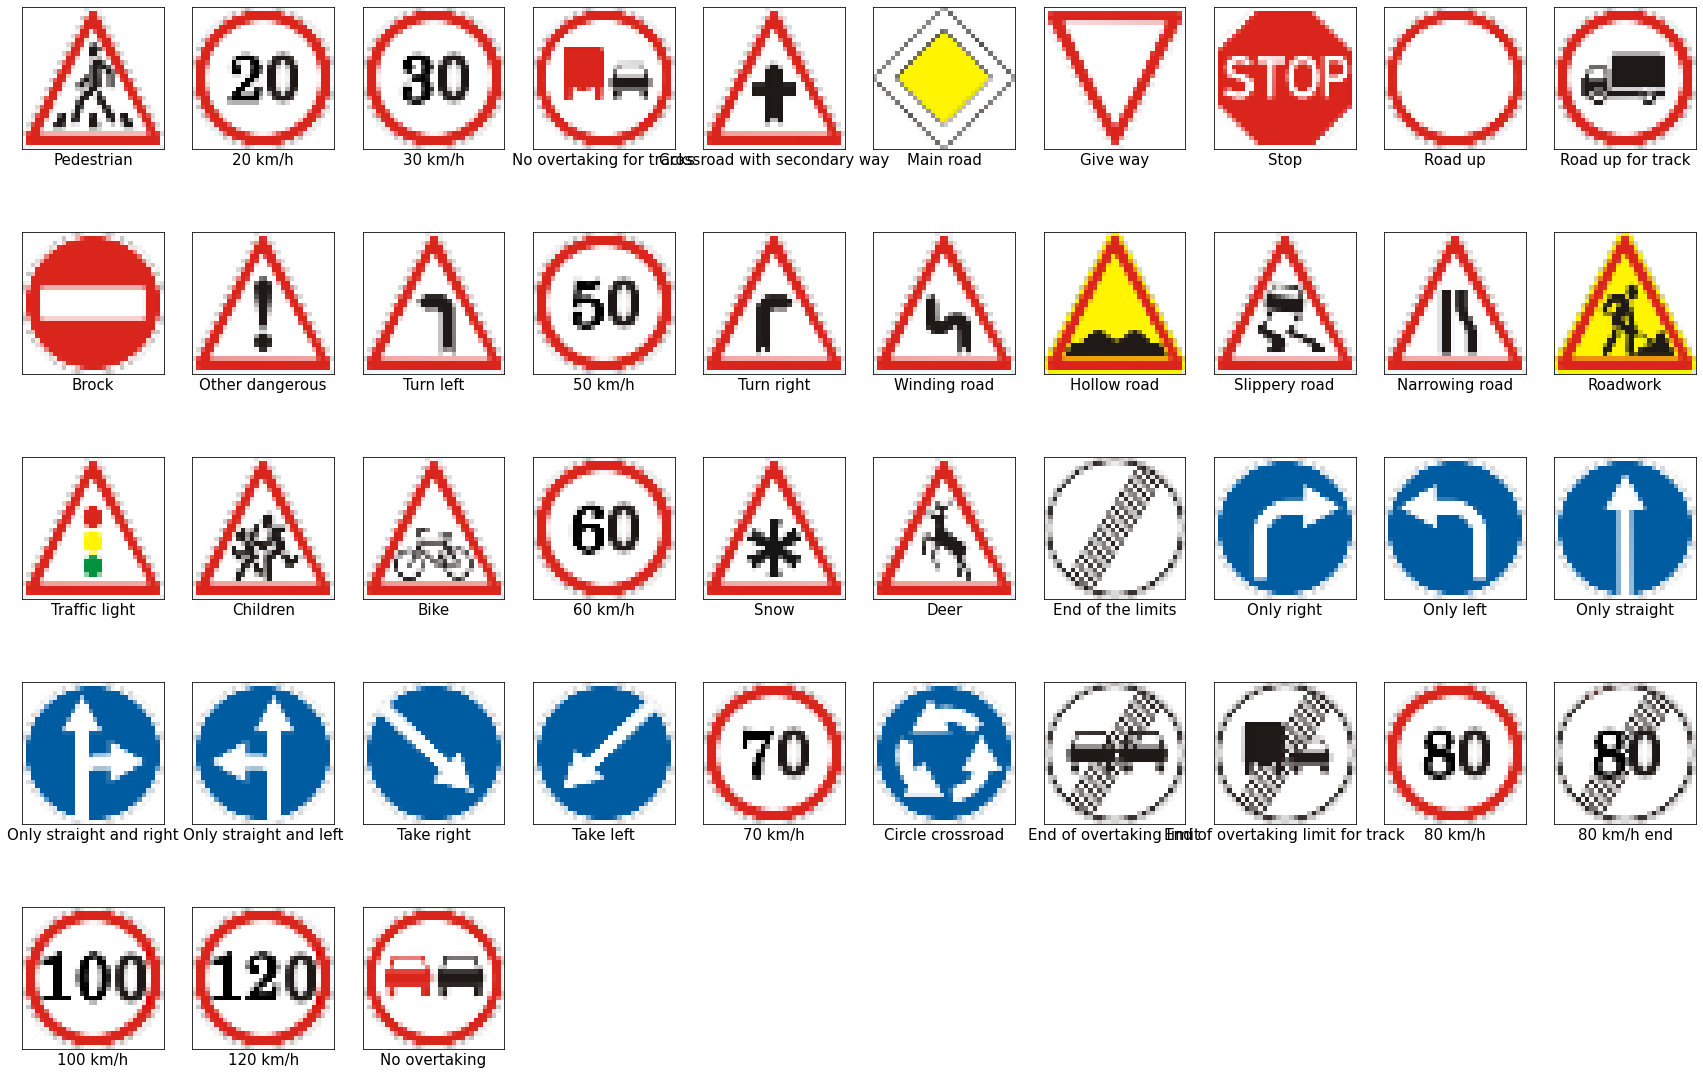

In [5]:
df = pd.read_csv(os.path.join(dataset_dir, 'Meta.csv'))
df = df.sort_values(by=['ClassId'])

meta_images = []
meta_labels = []

for i in range(df.shape[0]):
    label = df.ClassId[i]
    image_path_meta = df.Path[i]
    image_path = os.path.join(dataset_dir, image_path_meta)
    image = plt.imread(image_path)
    image = cv2.resize(image, (32, 32))
    meta_images.append(image)
    meta_labels.append(folderMap[int(label)])

fig = plt.figure(figsize=(30, 20))
for i in range(len(meta_images)):
    ax = fig.add_subplot(5, 10, i+1)
    plt.axis()
    plt.xticks([])
    plt.yticks([])
    ax.set_xlabel(xlabel = meta_labels[i], fontsize=15)
    ax.imshow(meta_images[i])

## Read, label and change dimensions of images


In [6]:
images = []
labels = []
labels_idx = []

for label in os.listdir(Images):
    images_for_label = os.path.join(Images, label)
    for image in os.listdir(images_for_label):
        image = plt.imread(os.path.join(images_for_label, image))
        image = cv2.resize(image, (32, 32))
        images.append(image)
        labels.append(folderMap[int(label)])
        labels_idx.append(label)

## Shape and number of images

In [7]:
images = np.array(images)
labels = np.array(labels)
labels_idx = np.array(labels_idx, dtype='int32')

images.shape

(39209, 32, 32, 3)

In [8]:
len(labels)

39209

## Example images with labels

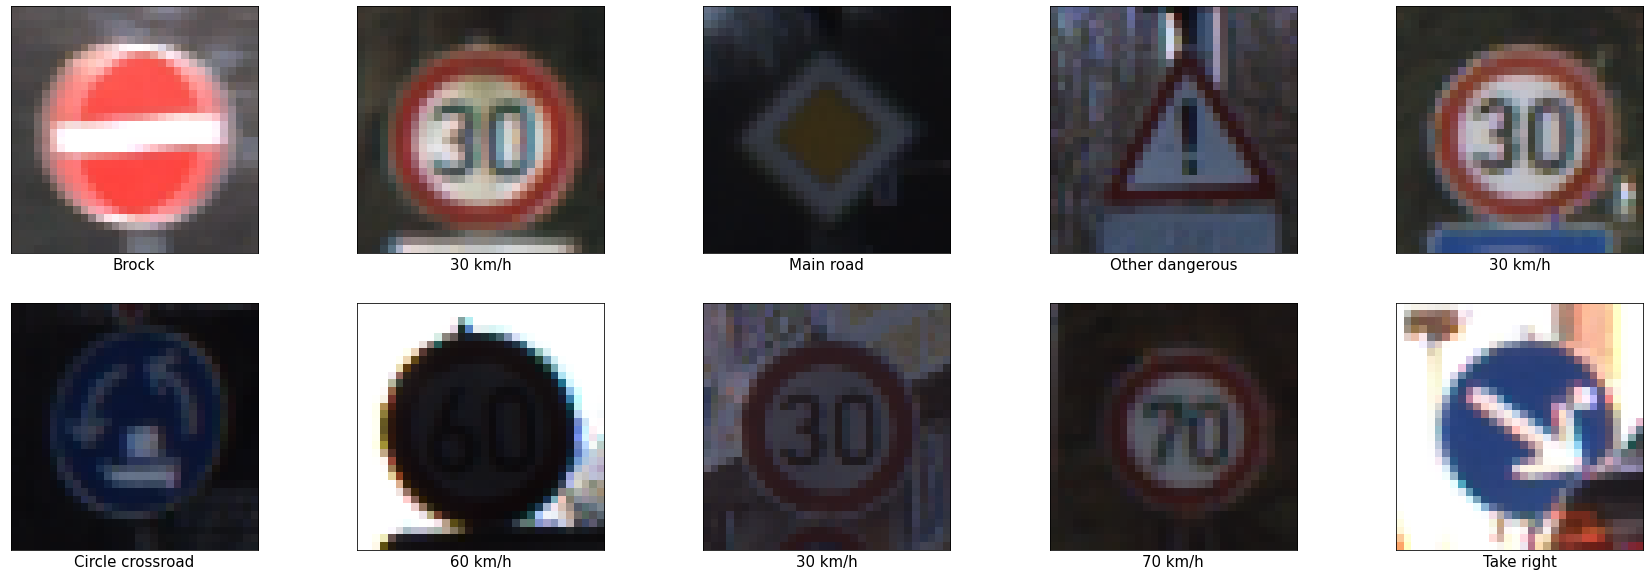

In [11]:
fig = plt.figure(figsize=(30, 10))
for i in range(10):
    random_num = np.random.randint(0, 39209)
    ax = fig.add_subplot(2, 5, i+1)
    plt.axis()
    plt.xticks([])
    plt.yticks([])
    ax.set_xlabel(xlabel = labels[random_num], fontsize=15)
    ax.imshow(images[random_num])

## Train / Test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    images, 
    labels_idx, 
    random_state=1, 
    stratify=labels_idx, 
    shuffle=True,
    test_size=0.3)

In [13]:
print("Training: ", len(X_train))

Training:  27446


In [14]:
print("Test: ", len(X_test))

Test:  11763


## The share of individual classes in TRAIN

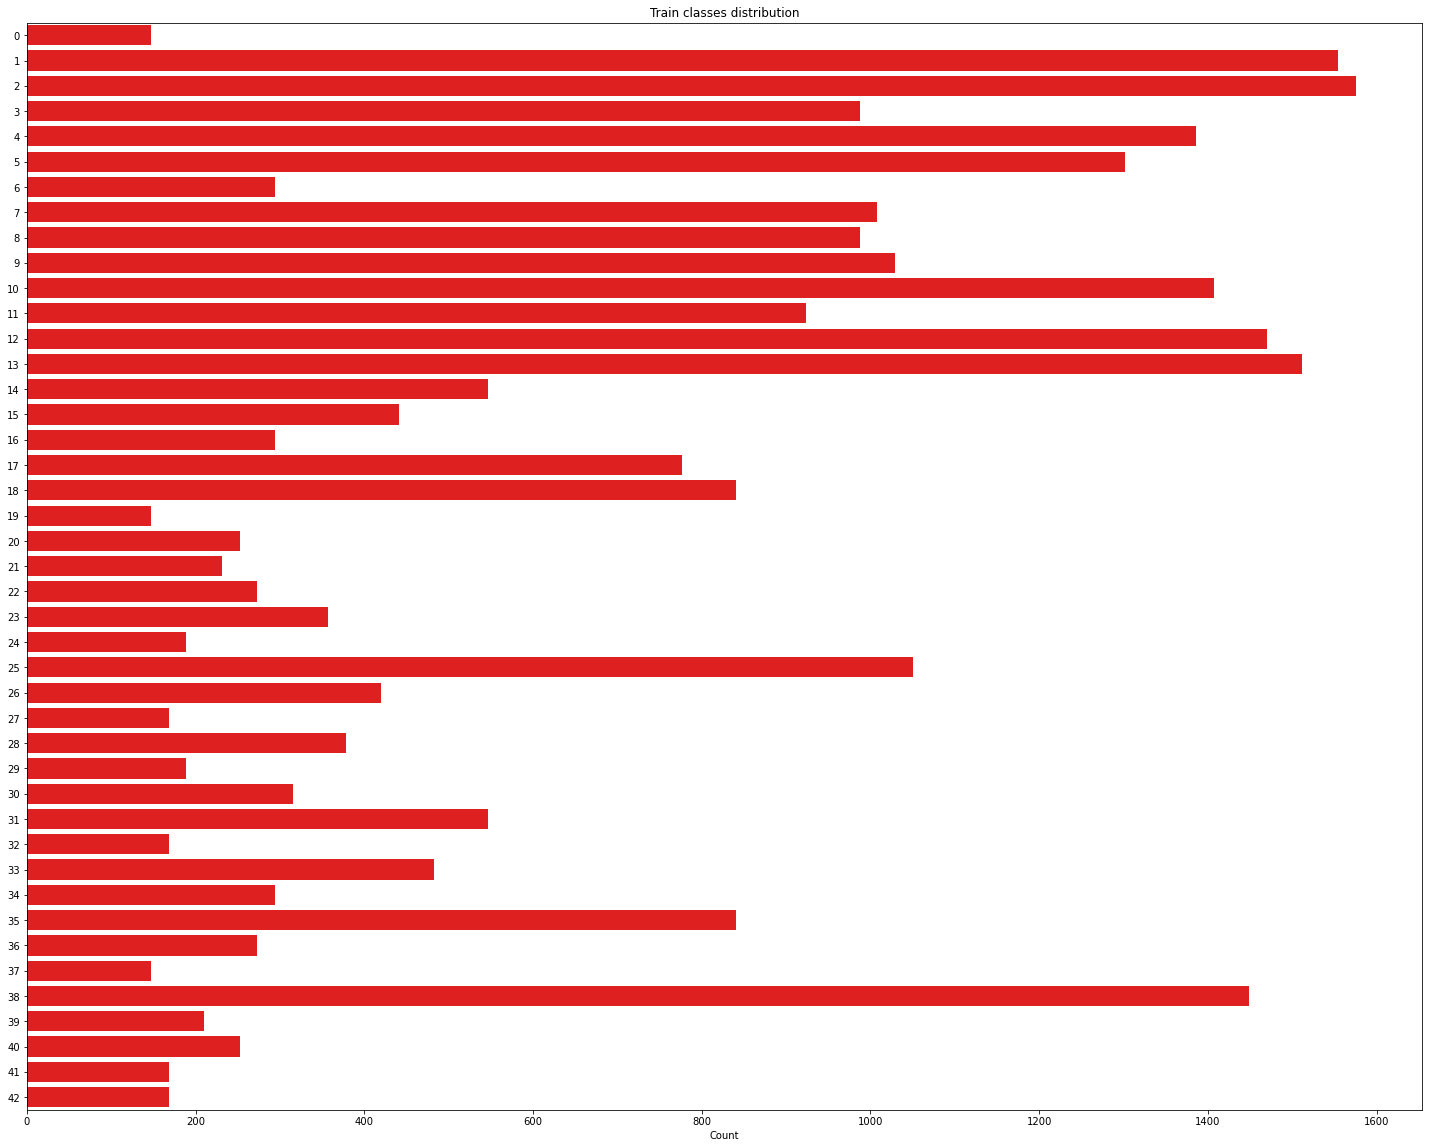

In [15]:
plt.figure(figsize=(25, 20))
plt.title('Train classes distribution')

sns.countplot(y=y_train, color="red")
plt.xlabel('Count')
plt.show()

In [16]:
signPercentageTrain = np.bincount(y_train)
signPercentageTrain  =list(map(lambda sign: (sign/y_train.shape[0])*100, signPercentageTrain))

for i in range(len(signPercentageTrain)):
    print(folderMap[i], ": ", round(signPercentageTrain[i], 2), "%")

20 km/h :  0.54 %
30 km/h :  5.66 %
50 km/h :  5.74 %
60 km/h :  3.6 %
70 km/h :  5.05 %
80 km/h :  4.74 %
80 km/h end :  1.07 %
100 km/h :  3.67 %
120 km/h :  3.6 %
No overtaking :  3.75 %
No overtaking for tracks :  5.13 %
Crossroad with secondary way :  3.37 %
Main road :  5.36 %
Give way :  5.51 %
Stop :  1.99 %
Road up :  1.61 %
Road up for track :  1.07 %
Brock :  2.83 %
Other dangerous :  3.06 %
Turn left :  0.54 %
Turn right :  0.92 %
Winding road :  0.84 %
Hollow road :  0.99 %
Slippery road :  1.3 %
Narrowing road :  0.69 %
Roadwork :  3.83 %
Traffic light :  1.53 %
Pedestrian :  0.61 %
Children :  1.38 %
Bike :  0.69 %
Snow :  1.15 %
Deer :  1.99 %
End of the limits :  0.61 %
Only right :  1.76 %
Only left :  1.07 %
Only straight :  3.06 %
Only straight and right :  0.99 %
Only straight and left :  0.54 %
Take right :  5.28 %
Take left :  0.77 %
Circle crossroad :  0.92 %
End of overtaking limit :  0.61 %
End of overtaking limit for track :  0.61 %


## The share of individual classes in TEST

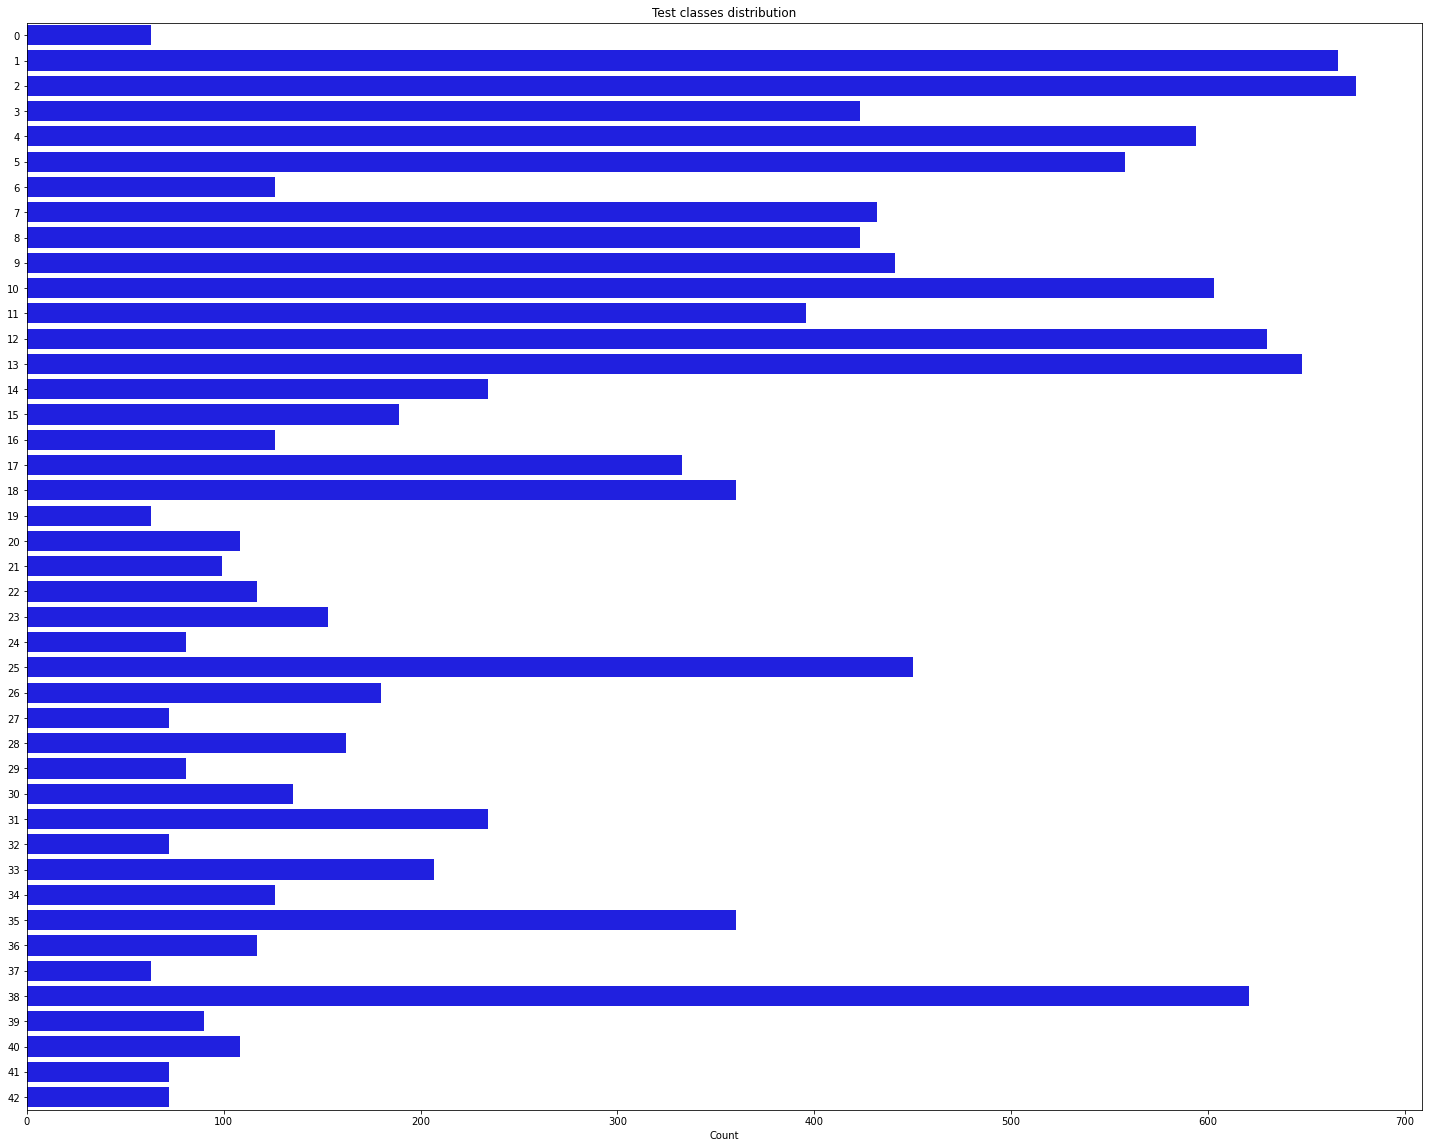

In [17]:
plt.figure(figsize=(25, 20))
plt.title('Test classes distribution')

sns.countplot(y=y_test, color="blue")
plt.xlabel('Count')
plt.show()

In [18]:
signPercentageTest = np.bincount(y_test)
signPercentageTest = list(map(lambda sign: (sign/y_test.shape[0])*100, signPercentageTest))

for i in range(len(signPercentageTest)):
    print(folderMap[i], ": ", round(signPercentageTest[i], 2), "%")

20 km/h :  0.54 %
30 km/h :  5.66 %
50 km/h :  5.74 %
60 km/h :  3.6 %
70 km/h :  5.05 %
80 km/h :  4.74 %
80 km/h end :  1.07 %
100 km/h :  3.67 %
120 km/h :  3.6 %
No overtaking :  3.75 %
No overtaking for tracks :  5.13 %
Crossroad with secondary way :  3.37 %
Main road :  5.36 %
Give way :  5.51 %
Stop :  1.99 %
Road up :  1.61 %
Road up for track :  1.07 %
Brock :  2.83 %
Other dangerous :  3.06 %
Turn left :  0.54 %
Turn right :  0.92 %
Winding road :  0.84 %
Hollow road :  0.99 %
Slippery road :  1.3 %
Narrowing road :  0.69 %
Roadwork :  3.83 %
Traffic light :  1.53 %
Pedestrian :  0.61 %
Children :  1.38 %
Bike :  0.69 %
Snow :  1.15 %
Deer :  1.99 %
End of the limits :  0.61 %
Only right :  1.76 %
Only left :  1.07 %
Only straight :  3.06 %
Only straight and right :  0.99 %
Only straight and left :  0.54 %
Take right :  5.28 %
Take left :  0.77 %
Circle crossroad :  0.92 %
End of overtaking limit :  0.61 %
End of overtaking limit for track :  0.61 %


## Model

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(43)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
!rm -rf logs/fit
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 43)                2795      
Total params: 404,395
Trainable params: 404,395
Non-trainable params: 0
_________________________________________________________________


## Training and evaluation

In [23]:
start = time.time()
history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback]
)
end = time.time()

Epoch 1/10
858/858 [==============================] - 2s 2ms/step - loss: 2.1303 - accuracy: 0.4463 - val_loss: 1.2303 - val_accuracy: 0.6509
Epoch 2/10
858/858 [==============================] - 2s 2ms/step - loss: 0.9390 - accuracy: 0.7447 - val_loss: 0.7161 - val_accuracy: 0.8219
Epoch 3/10
858/858 [==============================] - 2s 2ms/step - loss: 0.6626 - accuracy: 0.8207 - val_loss: 0.6068 - val_accuracy: 0.8382
Epoch 4/10
858/858 [==============================] - 2s 2ms/step - loss: 0.5322 - accuracy: 0.8564 - val_loss: 0.5006 - val_accuracy: 0.8664
Epoch 5/10
858/858 [==============================] - 2s 2ms/step - loss: 0.4710 - accuracy: 0.8737 - val_loss: 0.4581 - val_accuracy: 0.8821
Epoch 6/10
858/858 [==============================] - 2s 2ms/step - loss: 0.4022 - accuracy: 0.8923 - val_loss: 0.4341 - val_accuracy: 0.8842
Epoch 7/10
858/858 [==============================] - 2s 2ms/step - loss: 0.3822 - accuracy: 0.8977 - val_loss: 0.4756 - val_accuracy: 0.8802
Epoch 

In [24]:
trainingTimeDefault = round(end-start, 2)
print("Time:", trainingTimeDefault, "sec")

Time: 17.13 sec


In [25]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)

train_acc_default = train_acc

print('\nTrain accuracy:', round(train_acc*100, 2), "%")

858/858 - 1s - loss: 0.2610 - accuracy: 0.9269

Train accuracy: 92.69 %


In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

test_acc_default = test_acc

print('\nTest accuracy:', round(test_acc*100, 2), "%")

368/368 - 0s - loss: 0.3555 - accuracy: 0.9101

Test accuracy: 91.01 %


In [27]:
pred = model.predict(X_test)

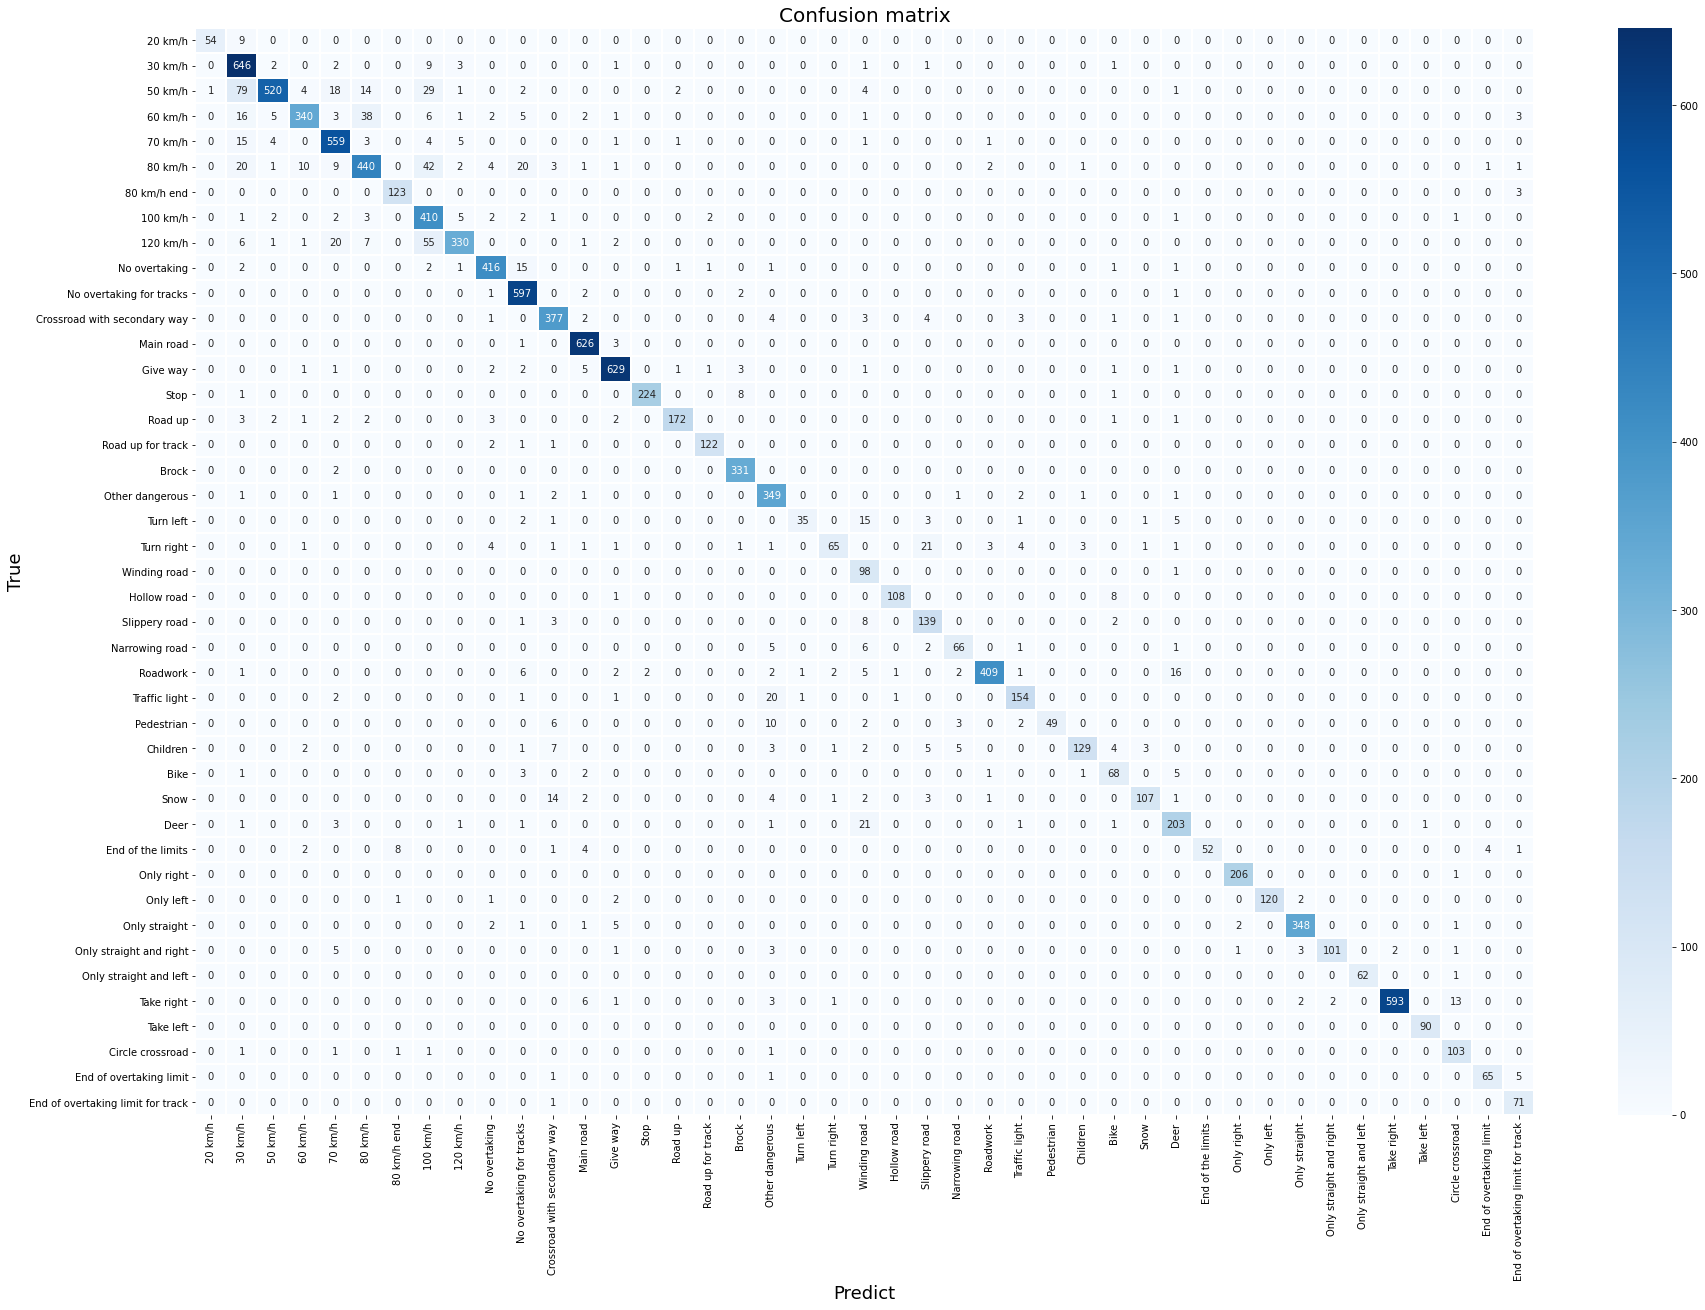

In [28]:
def highest_pred(matrix):
    return np.where(matrix == max(matrix))[0][0]
model_pred = list(map(highest_pred, pred))
confusion = confusion_matrix(y_test, model_pred)

plt.figure(figsize=(30,20))
sns.heatmap(confusion, 
            annot=True, 
            linewidths=1, 
            cmap='Blues', 
            fmt='g', 
            xticklabels=folderMap.values(), 
            yticklabels=folderMap.values())
plt.title("Confusion matrix", size=20)
plt.xlabel("Predict", size=18)
plt.ylabel("True", size=18)
plt.show()

## Model evaluation

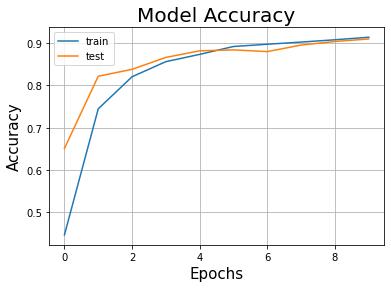

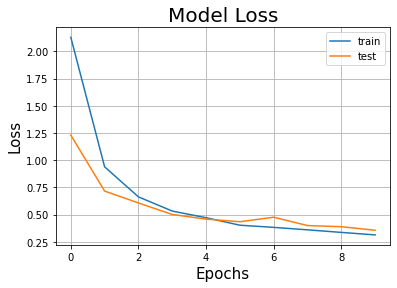

In [29]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.grid()
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.grid()
plt.legend()

plt.show()

## Analysis of the results

In [30]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model.predict(X_test)

In [32]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(folderMap[predicted_label],
                                100*np.max(predictions_array),
                                folderMap[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(43))
  plt.yticks([])
  thisplot = plt.bar(range(43), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

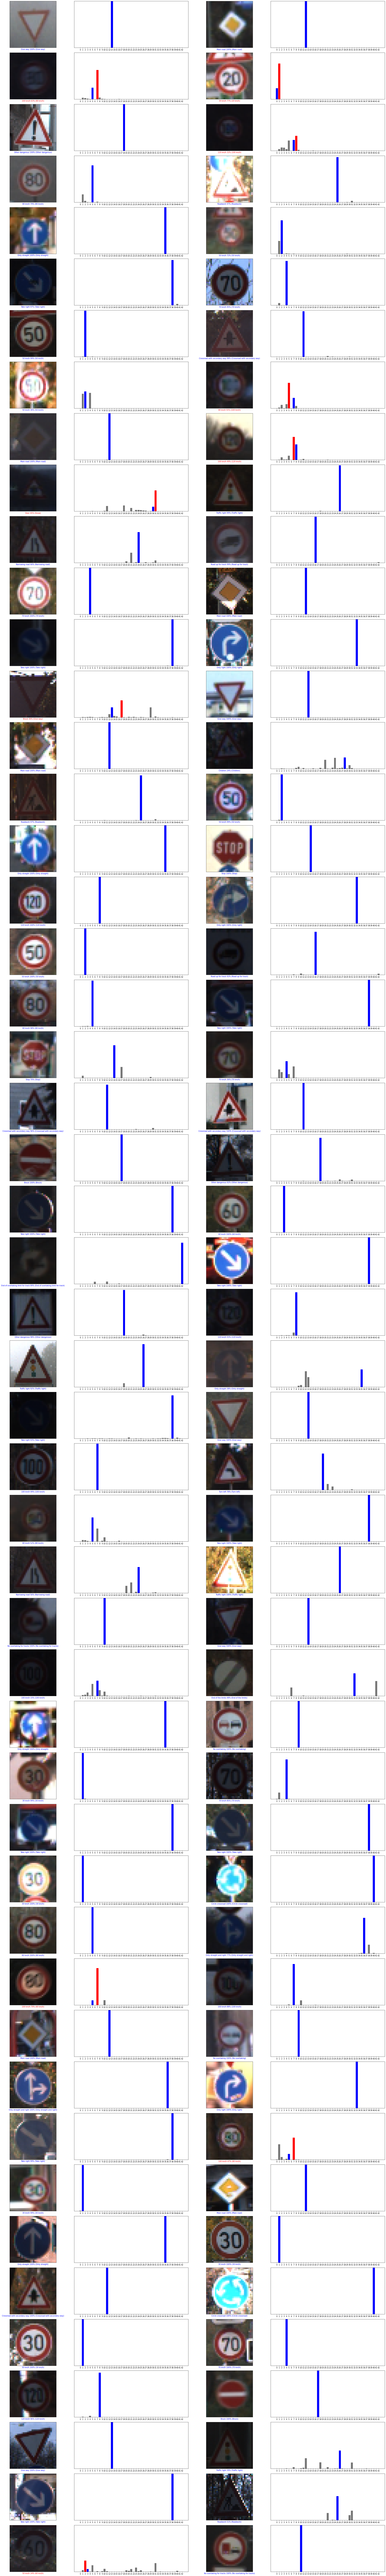

In [33]:
num_rows = 50
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(8*2*num_cols, 4*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  y_test)
plt.tight_layout()
plt.show()

## TensorBoard

In [2]:
%tensorboard --logdir logs/fit

## Adjusting model parameters

### Changing activation function
#### *sigmoid*

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(43)
])

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
858/858 [==============================] - 2s 2ms/step - loss: 2.5457 - accuracy: 0.3569 - val_loss: 1.6561 - val_accuracy: 0.5558
Epoch 2/10
858/858 [==============================] - 2s 2ms/step - loss: 1.2447 - accuracy: 0.6743 - val_loss: 0.9808 - val_accuracy: 0.7629
Epoch 3/10
858/858 [==============================] - 2s 2ms/step - loss: 0.7675 - accuracy: 0.8103 - val_loss: 0.7156 - val_accuracy: 0.8120
Epoch 4/10
858/858 [==============================] - 2s 2ms/step - loss: 0.5608 - accuracy: 0.8619 - val_loss: 0.4939 - val_accuracy: 0.8835
Epoch 5/10
858/858 [==============================] - 2s 2ms/step - loss: 0.4366 - accuracy: 0.8907 - val_loss: 0.4559 - val_accuracy: 0.8842
Epoch 6/10
858/858 [==============================] - 2s 2ms/step - loss: 0.3606 - accuracy: 0.9102 - val_loss: 0.4691 - val_accuracy: 0.8721
Epoch 7/10
858/858 [==============================] - 2s 2ms/step - loss: 0.3145 - accuracy: 0.9208 - val_loss: 0.3525 - val_accuracy: 0.9112
Epoch 

In [45]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)

train_acc_sigmoid = train_acc

print('\nTrain accuracy:', round(train_acc*100, 2), "%")

858/858 - 1s - loss: 0.2522 - accuracy: 0.9357

Train accuracy: 93.57 %


In [46]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

test_acc_sigmoid = test_acc

print('\nTest accuracy:', round(test_acc*100, 2), "%")

368/368 - 0s - loss: 0.3072 - accuracy: 0.9210

Test accuracy: 92.1 %


In [47]:
pred = model.predict(X_test)

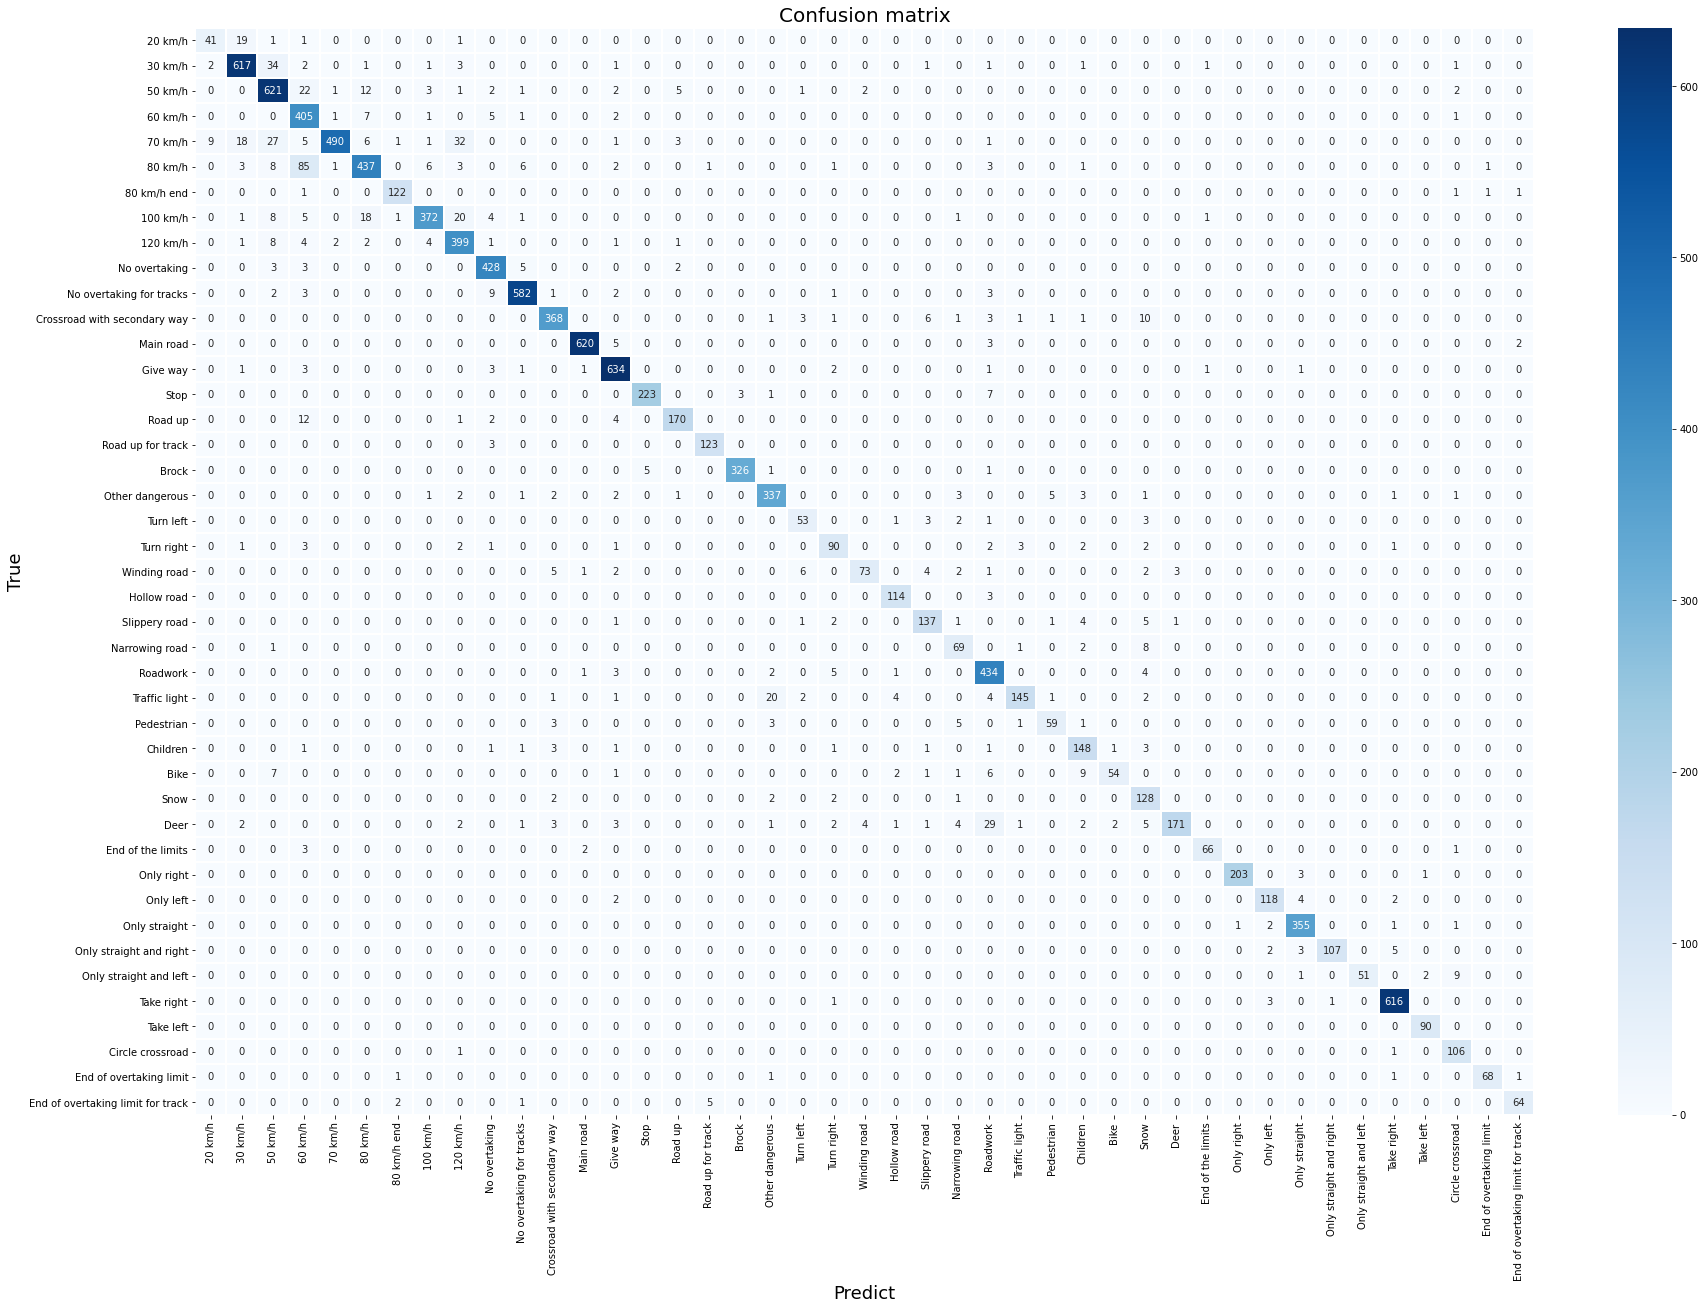

In [48]:
model_pred = list(map(highest_pred, pred))
confusion = confusion_matrix(y_test, model_pred)

plt.figure(figsize=(30,20))
sns.heatmap(confusion, 
            annot=True, 
            linewidths=1, 
            cmap='Blues', 
            fmt='g', 
            xticklabels=folderMap.values(), 
            yticklabels=folderMap.values())
plt.title("Confusion matrix", size=20)
plt.xlabel("Predict", size=18)
plt.ylabel("True", size=18)
plt.show()

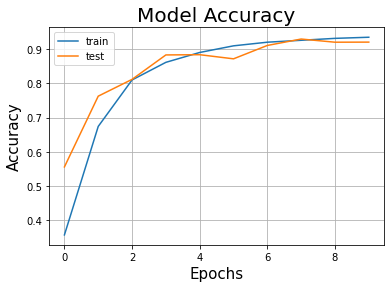

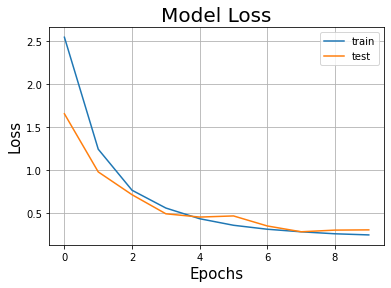

In [49]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.grid()
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.grid()
plt.legend()

plt.show()

#### *softplus*

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='softplus'),
    tf.keras.layers.Dense(64, activation='softplus'),
    tf.keras.layers.Dense(43)
])

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
858/858 [==============================] - 2s 2ms/step - loss: 1.9155 - accuracy: 0.4807 - val_loss: 1.0854 - val_accuracy: 0.7088
Epoch 2/10
858/858 [==============================] - 2s 2ms/step - loss: 0.8620 - accuracy: 0.7554 - val_loss: 0.7226 - val_accuracy: 0.7910
Epoch 3/10
858/858 [==============================] - 2s 2ms/step - loss: 0.5940 - accuracy: 0.8331 - val_loss: 0.6386 - val_accuracy: 0.8132
Epoch 4/10
858/858 [==============================] - 2s 2ms/step - loss: 0.4886 - accuracy: 0.8615 - val_loss: 0.5267 - val_accuracy: 0.8536
Epoch 5/10
858/858 [==============================] - 2s 2ms/step - loss: 0.4027 - accuracy: 0.8865 - val_loss: 0.4932 - val_accuracy: 0.8622
Epoch 6/10
858/858 [==============================] - 2s 2ms/step - loss: 0.3458 - accuracy: 0.9007 - val_loss: 0.3357 - val_accuracy: 0.9120
Epoch 7/10
858/858 [==============================] - 2s 2ms/step - loss: 0.3191 - accuracy: 0.9095 - val_loss: 0.4674 - val_accuracy: 0.8676
Epoch 

In [53]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)

train_acc_softplus = train_acc

print('\nTrain accuracy:', round(train_acc*100, 2), "%")

858/858 - 1s - loss: 0.1984 - accuracy: 0.9437

Train accuracy: 94.37 %


In [54]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

test_acc_softplus = test_acc

print('\nTest accuracy:', round(test_acc*100, 2), "%")

368/368 - 0s - loss: 0.2984 - accuracy: 0.9266

Test accuracy: 92.66 %


In [55]:
pred = model.predict(X_test)

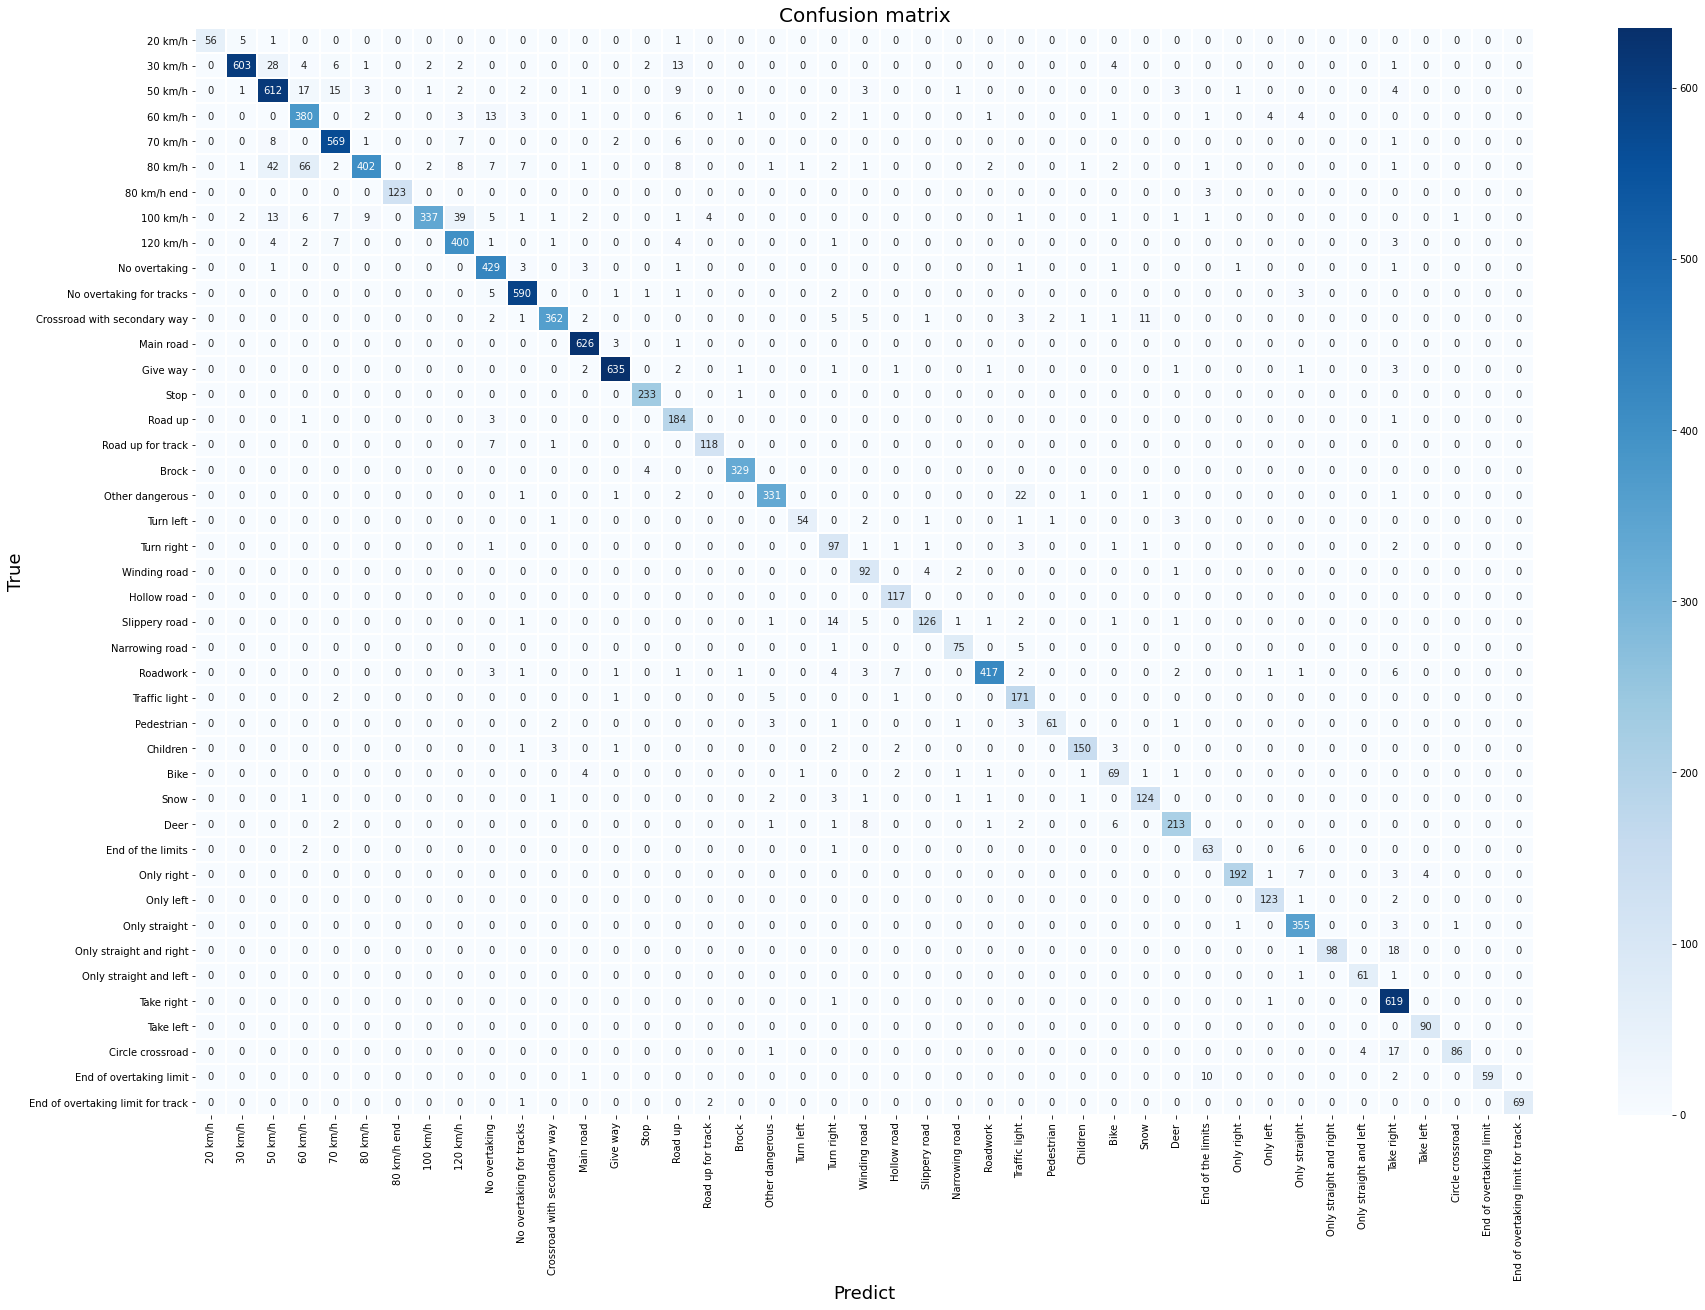

In [56]:
model_pred = list(map(highest_pred, pred))
confusion = confusion_matrix(y_test, model_pred)

plt.figure(figsize=(30,20))
sns.heatmap(confusion, 
            annot=True, 
            linewidths=1, 
            cmap='Blues', 
            fmt='g', 
            xticklabels=folderMap.values(), 
            yticklabels=folderMap.values())
plt.title("Confusion matrix", size=20)
plt.xlabel("Predict", size=18)
plt.ylabel("True", size=18)
plt.show()

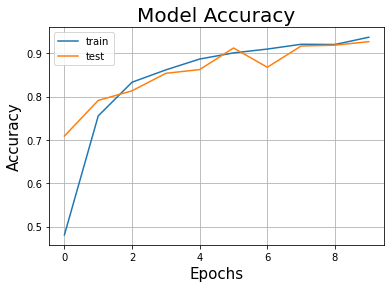

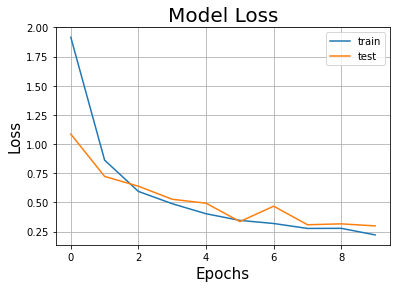

In [57]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.grid()
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.grid()
plt.legend()

plt.show()

### Increasing number of epochs

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(43)
])

In [68]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [69]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=25,
    validation_data=(X_test, y_test)
)

Epoch 1/25
858/858 [==============================] - 2s 2ms/step - loss: 2.1030 - accuracy: 0.4630 - val_loss: 1.1894 - val_accuracy: 0.6883
Epoch 2/25
858/858 [==============================] - 2s 2ms/step - loss: 0.9701 - accuracy: 0.7338 - val_loss: 0.7854 - val_accuracy: 0.7949
Epoch 3/25
858/858 [==============================] - 2s 2ms/step - loss: 0.6797 - accuracy: 0.8153 - val_loss: 0.5911 - val_accuracy: 0.8442
Epoch 4/25
858/858 [==============================] - 2s 2ms/step - loss: 0.5716 - accuracy: 0.8474 - val_loss: 0.5605 - val_accuracy: 0.8480
Epoch 5/25
858/858 [==============================] - 2s 2ms/step - loss: 0.4860 - accuracy: 0.8713 - val_loss: 0.6364 - val_accuracy: 0.8255
Epoch 6/25
858/858 [==============================] - 2s 2ms/step - loss: 0.4289 - accuracy: 0.8888 - val_loss: 0.4146 - val_accuracy: 0.8984
Epoch 7/25
858/858 [==============================] - 2s 2ms/step - loss: 0.3916 - accuracy: 0.8959 - val_loss: 0.4922 - val_accuracy: 0.8732
Epoch 

In [70]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', round(test_acc*100, 2), "%")

368/368 - 0s - loss: 0.2655 - accuracy: 0.9444

Test accuracy: 94.44 %


In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(43)
])

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=30,
    validation_data=(X_test, y_test)
)

Epoch 1/30
858/858 [==============================] - 2s 2ms/step - loss: 2.1994 - accuracy: 0.4311 - val_loss: 1.2846 - val_accuracy: 0.6493
Epoch 2/30
858/858 [==============================] - 2s 2ms/step - loss: 1.0309 - accuracy: 0.7208 - val_loss: 0.7899 - val_accuracy: 0.7912
Epoch 3/30
858/858 [==============================] - 2s 2ms/step - loss: 0.7252 - accuracy: 0.8043 - val_loss: 0.6665 - val_accuracy: 0.8156
Epoch 4/30
858/858 [==============================] - 2s 2ms/step - loss: 0.6019 - accuracy: 0.8366 - val_loss: 0.6144 - val_accuracy: 0.8162
Epoch 5/30
858/858 [==============================] - 2s 2ms/step - loss: 0.5057 - accuracy: 0.8634 - val_loss: 0.4459 - val_accuracy: 0.8807
Epoch 6/30
858/858 [==============================] - 2s 2ms/step - loss: 0.4468 - accuracy: 0.8781 - val_loss: 0.5926 - val_accuracy: 0.8401
Epoch 7/30
858/858 [==============================] - 2s 2ms/step - loss: 0.4012 - accuracy: 0.8919 - val_loss: 0.3937 - val_accuracy: 0.9042
Epoch 

In [74]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', round(test_acc*100, 2), "%")

368/368 - 0s - loss: 0.2733 - accuracy: 0.9435

Test accuracy: 94.35 %


### Changing number of hidden layer neurons

#### decreasing 50%

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(43)
])

In [76]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [77]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
858/858 [==============================] - 2s 1ms/step - loss: 2.3367 - accuracy: 0.4067 - val_loss: 1.4539 - val_accuracy: 0.6163
Epoch 2/10
858/858 [==============================] - 1s 1ms/step - loss: 1.1976 - accuracy: 0.6765 - val_loss: 1.0184 - val_accuracy: 0.7263
Epoch 3/10
858/858 [==============================] - 1s 1ms/step - loss: 0.8709 - accuracy: 0.7696 - val_loss: 0.7253 - val_accuracy: 0.8278
Epoch 4/10
858/858 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.8182 - val_loss: 0.6550 - val_accuracy: 0.8334
Epoch 5/10
858/858 [==============================] - 1s 1ms/step - loss: 0.6000 - accuracy: 0.8444 - val_loss: 0.6448 - val_accuracy: 0.8234
Epoch 6/10
858/858 [==============================] - 1s 2ms/step - loss: 0.5349 - accuracy: 0.8596 - val_loss: 0.5776 - val_accuracy: 0.8494
Epoch 7/10
858/858 [==============================] - 1s 2ms/step - loss: 0.5008 - accuracy: 0.8707 - val_loss: 0.4990 - val_accuracy: 0.8676
Epoch 

In [78]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)

train_acc_dec50 = train_acc

print('\nTrain accuracy:', round(train_acc*100, 2), "%")

858/858 - 1s - loss: 0.3886 - accuracy: 0.8987

Train accuracy: 89.87 %


In [79]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

test_acc_dec50 = test_acc

print('\nTest accuracy:', round(test_acc*100, 2), "%")

368/368 - 0s - loss: 0.4844 - accuracy: 0.8821

Test accuracy: 88.21 %


#### increasing 50%

In [80]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(43)
])

In [81]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [82]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
858/858 [==============================] - 5s 5ms/step - loss: 1.8795 - accuracy: 0.5046 - val_loss: 1.2396 - val_accuracy: 0.6498
Epoch 2/10
858/858 [==============================] - 4s 5ms/step - loss: 0.8114 - accuracy: 0.7716 - val_loss: 0.7243 - val_accuracy: 0.8125
Epoch 3/10
858/858 [==============================] - 4s 5ms/step - loss: 0.5901 - accuracy: 0.8378 - val_loss: 0.5396 - val_accuracy: 0.8578
Epoch 4/10
858/858 [==============================] - 5s 5ms/step - loss: 0.4787 - accuracy: 0.8687 - val_loss: 0.4161 - val_accuracy: 0.8935
Epoch 5/10
858/858 [==============================] - 4s 5ms/step - loss: 0.4150 - accuracy: 0.8875 - val_loss: 0.4224 - val_accuracy: 0.8804
Epoch 6/10
858/858 [==============================] - 5s 5ms/step - loss: 0.3643 - accuracy: 0.8971 - val_loss: 0.3613 - val_accuracy: 0.9021
Epoch 7/10
858/858 [==============================] - 5s 5ms/step - loss: 0.3298 - accuracy: 0.9095 - val_loss: 0.4491 - val_accuracy: 0.8885
Epoch 

In [83]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)

train_acc_inc50 = train_acc

print('\nTrain accuracy:', round(train_acc*100, 2), "%")

858/858 - 1s - loss: 0.1996 - accuracy: 0.9416

Train accuracy: 94.16 %


In [84]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

test_acc_inc50 = test_acc

print('\nTest accuracy:', round(test_acc*100, 2), "%")

368/368 - 0s - loss: 0.2940 - accuracy: 0.9215

Test accuracy: 92.15 %


#### increasing 200%

In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(43)
])

In [86]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [87]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
858/858 [==============================] - 21s 24ms/step - loss: 1.7300 - accuracy: 0.5353 - val_loss: 0.8795 - val_accuracy: 0.7613
Epoch 2/10
858/858 [==============================] - 20s 23ms/step - loss: 0.7494 - accuracy: 0.7847 - val_loss: 0.6481 - val_accuracy: 0.8211
Epoch 3/10
858/858 [==============================] - 20s 23ms/step - loss: 0.5051 - accuracy: 0.8527 - val_loss: 0.4164 - val_accuracy: 0.8774
Epoch 4/10
858/858 [==============================] - 20s 23ms/step - loss: 0.4092 - accuracy: 0.8794 - val_loss: 0.3910 - val_accuracy: 0.8835
Epoch 5/10
858/858 [==============================] - 20s 23ms/step - loss: 0.3540 - accuracy: 0.8960 - val_loss: 0.3289 - val_accuracy: 0.9067
Epoch 6/10
858/858 [==============================] - 20s 24ms/step - loss: 0.3108 - accuracy: 0.9063 - val_loss: 0.2438 - val_accuracy: 0.9396
Epoch 7/10
858/858 [==============================] - 20s 24ms/step - loss: 0.2590 - accuracy: 0.9210 - val_loss: 0.3883 - val_accuracy:

In [88]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)

train_acc_inc200 = train_acc

print('\nTrain accuracy:', round(train_acc*100, 2), "%")

858/858 - 3s - loss: 0.2276 - accuracy: 0.9272

Train accuracy: 92.72 %


In [89]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

test_acc_inc200 = test_acc

print('\nTest accuracy:', round(test_acc*100, 2), "%")

368/368 - 1s - loss: 0.3297 - accuracy: 0.9092

Test accuracy: 90.92 %


### Adding 2 extra hidden layers

In [90]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(43)
])

In [91]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [92]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
858/858 [==============================] - 5s 6ms/step - loss: 2.2559 - accuracy: 0.3712 - val_loss: 1.7924 - val_accuracy: 0.4618
Epoch 2/10
858/858 [==============================] - 5s 5ms/step - loss: 1.1594 - accuracy: 0.6475 - val_loss: 1.0562 - val_accuracy: 0.6892
Epoch 3/10
858/858 [==============================] - 5s 5ms/step - loss: 0.8360 - accuracy: 0.7461 - val_loss: 0.7391 - val_accuracy: 0.7719
Epoch 4/10
858/858 [==============================] - 4s 5ms/step - loss: 0.6450 - accuracy: 0.8025 - val_loss: 0.5495 - val_accuracy: 0.8441
Epoch 5/10
858/858 [==============================] - 4s 5ms/step - loss: 0.5433 - accuracy: 0.8355 - val_loss: 0.6987 - val_accuracy: 0.7905
Epoch 6/10
858/858 [==============================] - 5s 5ms/step - loss: 0.4552 - accuracy: 0.8599 - val_loss: 0.4360 - val_accuracy: 0.8675
Epoch 7/10
858/858 [==============================] - 5s 5ms/step - loss: 0.4200 - accuracy: 0.8713 - val_loss: 0.3861 - val_accuracy: 0.8863
Epoch 

In [93]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)

train_acc_2_extra = train_acc

print('\nTrain accuracy:', round(train_acc*100, 2), "%")

858/858 - 1s - loss: 0.3397 - accuracy: 0.8961

Train accuracy: 89.61 %


In [94]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

test_acc_2_extra = test_acc

print('\nTest accuracy:', round(test_acc*100, 2), "%")

368/368 - 0s - loss: 0.4458 - accuracy: 0.8767

Test accuracy: 87.67 %


#### Comparison

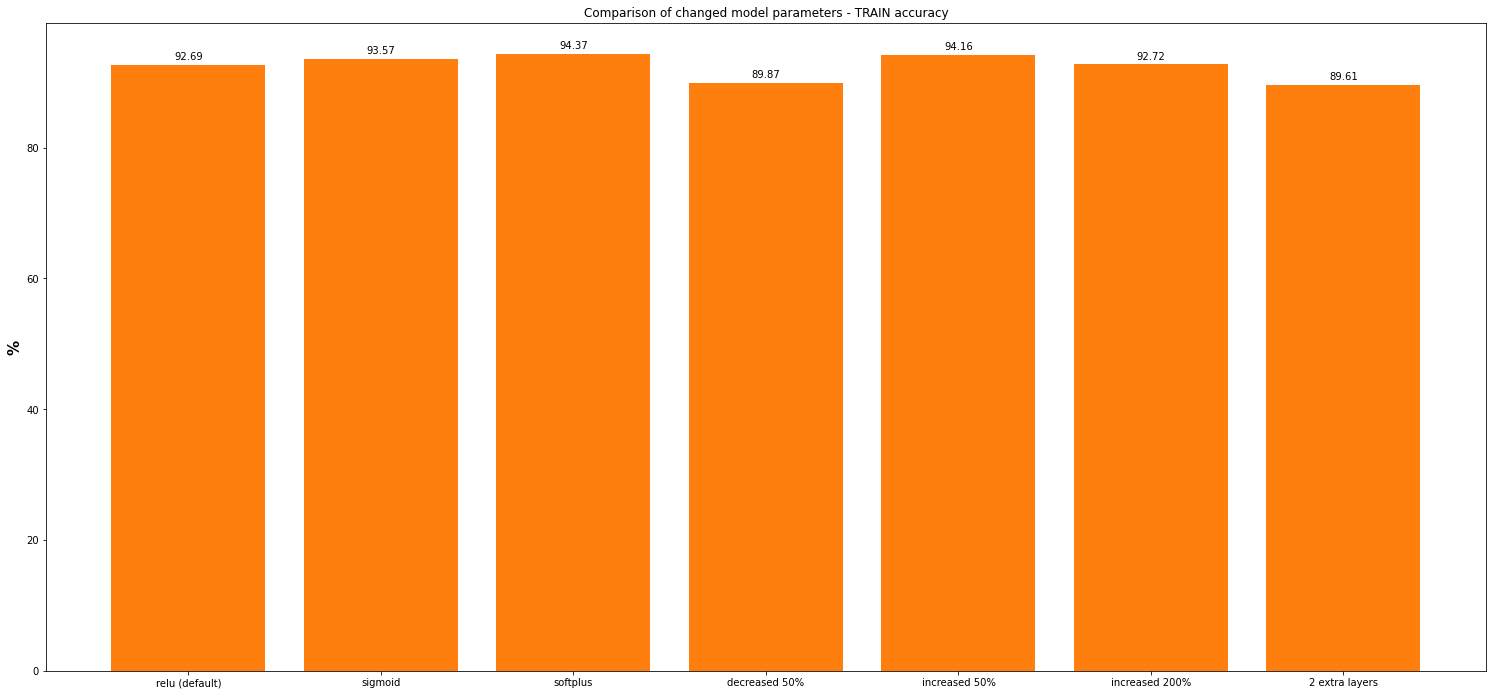

In [95]:
labels = ['relu (default)', 'sigmoid', 'softplus', 'decreased 50%', 'increased 50%', 'increased 200%', '2 extra layers']
accuracy = [round(train_acc_default*100, 2), round(train_acc_sigmoid*100, 2), round(train_acc_softplus*100, 2), round(train_acc_dec50*100, 2), round(train_acc_inc50*100, 2), round(train_acc_inc200*100, 2), round(train_acc_2_extra*100, 2)]

fig = plt.figure(figsize=(20, 9))
ax = fig.add_axes([0,0,1,1])

x = np.arange(len(accuracy))
rects = ax.bar(x, accuracy)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

ax.bar(labels,accuracy)
plt.ylabel('%', fontweight ='bold', fontsize = 15)
plt.title("Comparison of changed model parameters - TRAIN accuracy", fontsize=12)
plt.show()

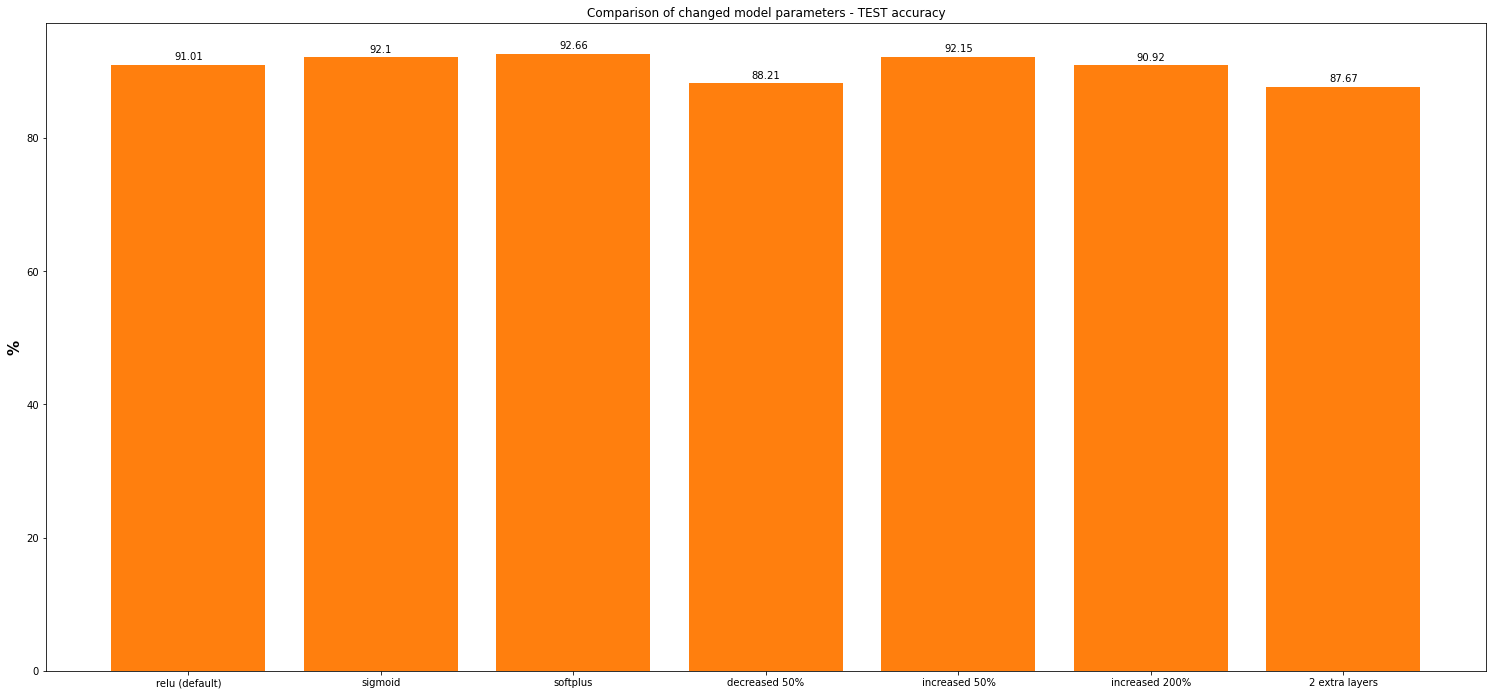

In [96]:
labels = ['relu (default)', 'sigmoid', 'softplus', 'decreased 50%', 'increased 50%', 'increased 200%', '2 extra layers']
accuracy = [round(test_acc_default*100, 2), round(test_acc_sigmoid*100, 2), round(test_acc_softplus*100, 2), round(test_acc_dec50*100, 2), round(test_acc_inc50*100, 2), round(test_acc_inc200*100, 2), round(test_acc_2_extra*100, 2)]

fig = plt.figure(figsize=(20, 9))
ax = fig.add_axes([0,0,1,1])

x = np.arange(len(accuracy))
rects = ax.bar(x, accuracy)

autolabel(rects)

ax.bar(labels,accuracy)
plt.ylabel('%', fontweight ='bold', fontsize = 15)
plt.title("Comparison of changed model parameters - TEST accuracy", fontsize=12)
plt.show()

## Convolutional neural networks

In [97]:
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(43))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 2048)            

In [98]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [99]:
start = time.time()
history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback]
)
end = time.time()

Epoch 1/10
858/858 [==============================] - 37s 43ms/step - loss: 1.1998 - accuracy: 0.6461 - val_loss: 0.1849 - val_accuracy: 0.9419
Epoch 2/10
858/858 [==============================] - 37s 43ms/step - loss: 0.1190 - accuracy: 0.9653 - val_loss: 0.0711 - val_accuracy: 0.9811
Epoch 3/10
858/858 [==============================] - 38s 45ms/step - loss: 0.0552 - accuracy: 0.9842 - val_loss: 0.0818 - val_accuracy: 0.9742
Epoch 4/10
858/858 [==============================] - 37s 44ms/step - loss: 0.0471 - accuracy: 0.9858 - val_loss: 0.0338 - val_accuracy: 0.9913
Epoch 5/10
858/858 [==============================] - 40s 46ms/step - loss: 0.0406 - accuracy: 0.9879 - val_loss: 0.0491 - val_accuracy: 0.9878
Epoch 6/10
858/858 [==============================] - 38s 45ms/step - loss: 0.0287 - accuracy: 0.9917 - val_loss: 0.0331 - val_accuracy: 0.9923
Epoch 7/10
858/858 [==============================] - 38s 44ms/step - loss: 0.0302 - accuracy: 0.9921 - val_loss: 0.0979 - val_accuracy:

In [100]:
trainingTimeConv = round(end-start, 2)
print("Time:", trainingTimeConv, "sec")

Time: 375.08 sec


In [101]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)

train_acc_conv = train_acc

print('\nTrain accuracy:', round(train_acc*100, 2), "%")

858/858 - 6s - loss: 0.0425 - accuracy: 0.9903

Train accuracy: 99.03 %


In [102]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

test_acc_conv = test_acc

print('\nTest accuracy:', round(test_acc*100, 2), "%")

368/368 - 3s - loss: 0.0867 - accuracy: 0.9823

Test accuracy: 98.23 %


In [103]:
pred = model.predict(X_test)

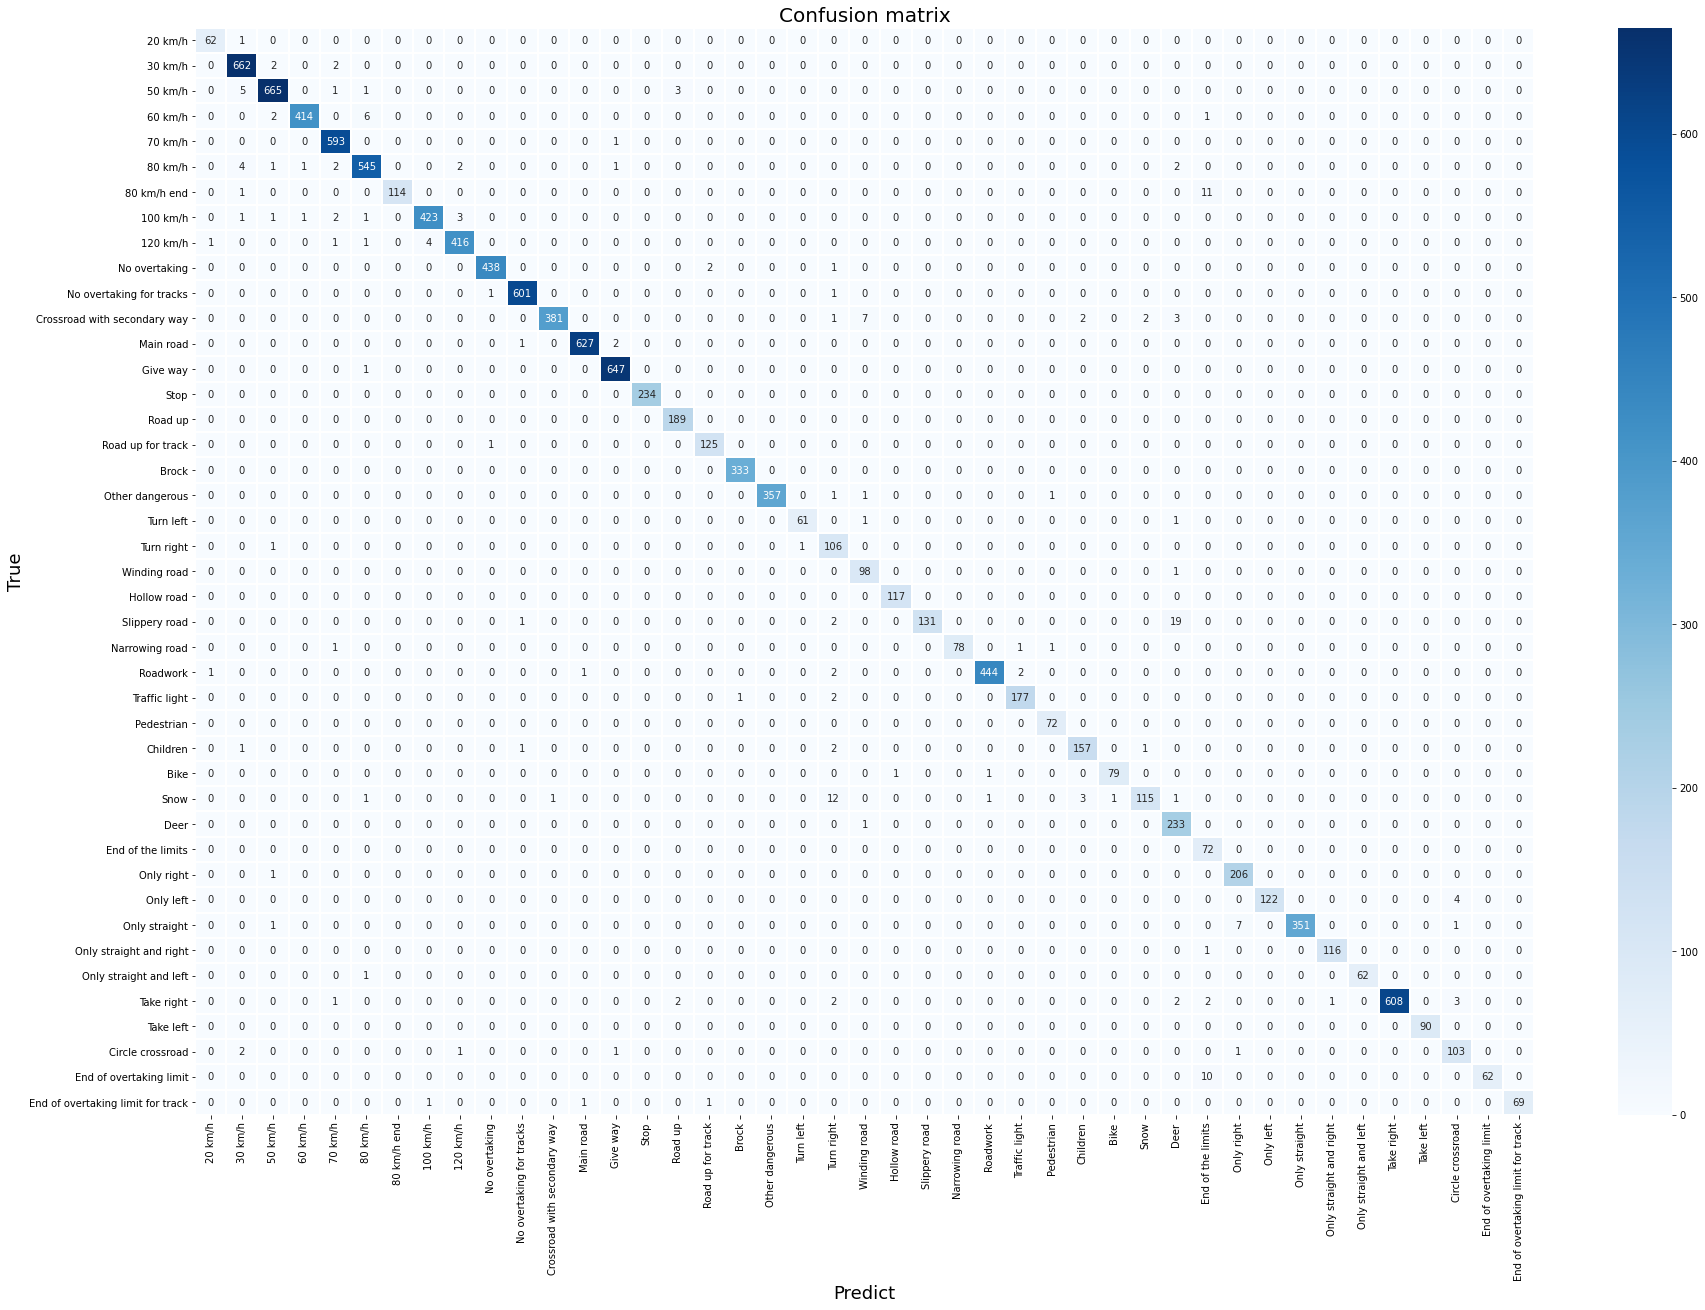

In [104]:
model_pred = list(map(highest_pred, pred))
confusion = confusion_matrix(y_test, model_pred)

plt.figure(figsize=(30,20))
sns.heatmap(confusion, 
            annot=True, 
            linewidths=1, 
            cmap='Blues', 
            fmt='g', 
            xticklabels=folderMap.values(), 
            yticklabels=folderMap.values())
plt.title("Confusion matrix", size=20)
plt.xlabel("Predict", size=18)
plt.ylabel("True", size=18)
plt.show()

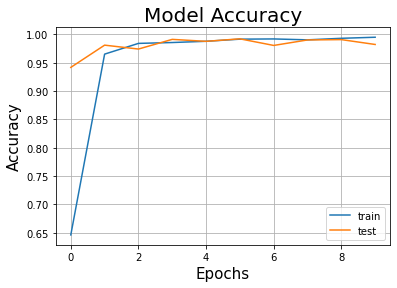

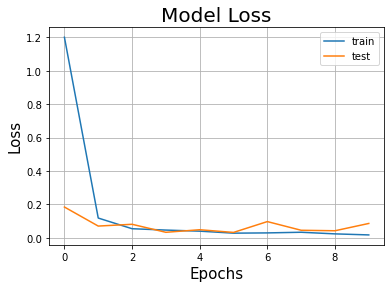

In [105]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.grid()
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.grid()
plt.legend()

plt.show()

In [106]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [107]:
predictions = probability_model.predict(X_test)

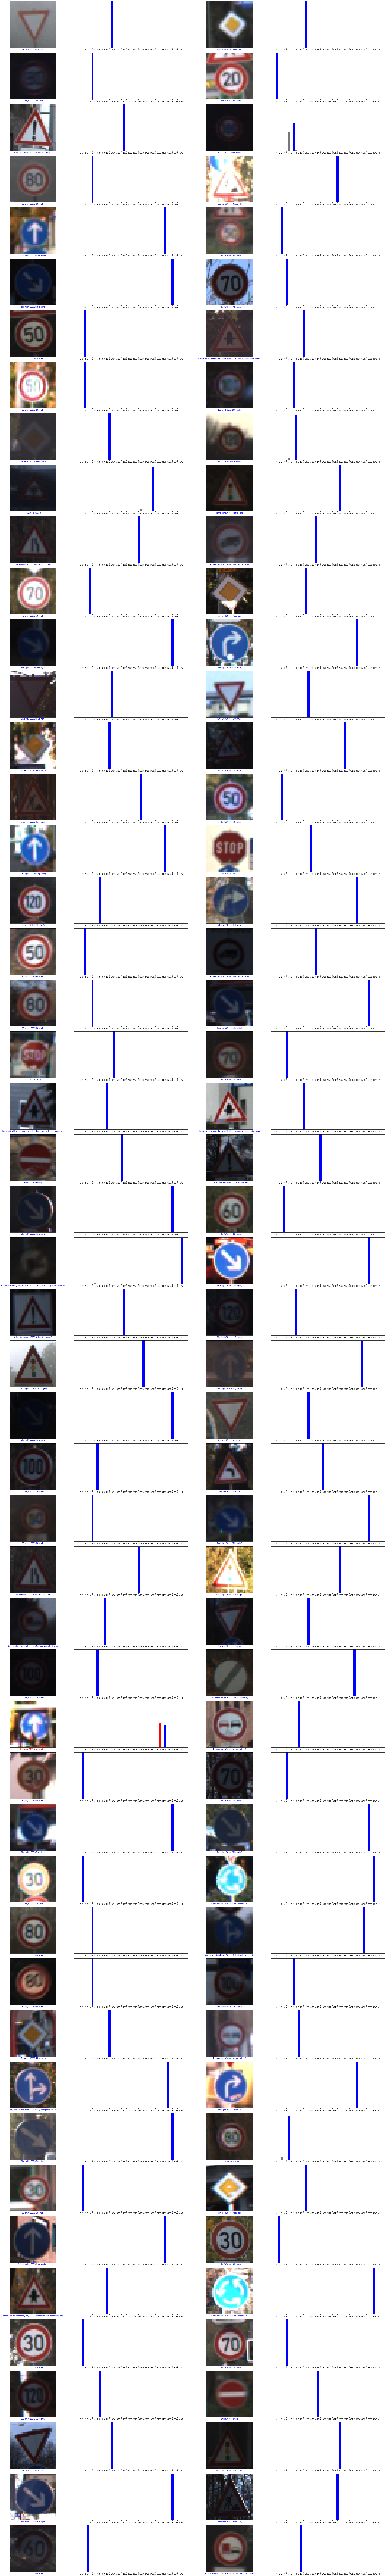

In [108]:
num_rows = 50
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(8*2*num_cols, 4*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  y_test)
plt.tight_layout()
plt.show()

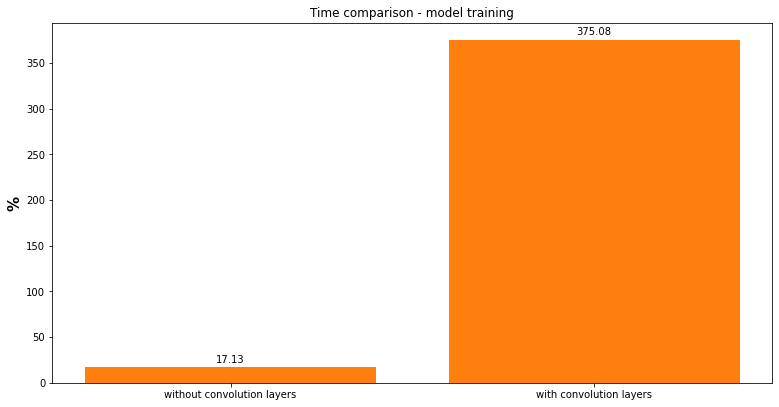

In [109]:
labels = ['without convolution layers', 'with convolution layers']
time = [trainingTimeDefault, trainingTimeConv]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])

x = np.arange(len(time))
rects = ax.bar(x, time)

autolabel(rects)

ax.bar(labels, time)
plt.ylabel('%', fontweight ='bold', fontsize = 15)
plt.title("Time comparison - model training", fontsize=12)
plt.show()

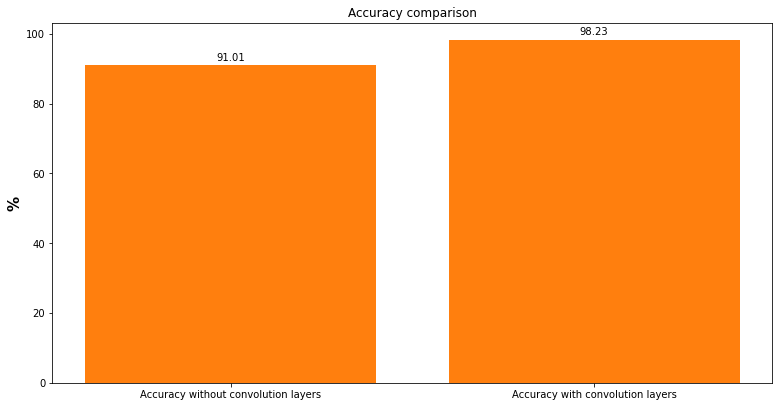

In [110]:
labels = ['Accuracy without convolution layers', 'Accuracy with convolution layers']
accuracy = [round(test_acc_default*100, 2), round(test_acc_conv*100, 2)]

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])

x = np.arange(len(accuracy))
rects = ax.bar(x, accuracy)

autolabel(rects)

ax.bar(labels,accuracy)
plt.ylabel('%', fontweight ='bold', fontsize = 15)
plt.title("Accuracy comparison", fontsize=12)
plt.show()